In [42]:
import sys
sys.path.append('../')

In [43]:
import game.agent as ag
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [44]:
plt.rcParams.update({'font.size': 22})

## Description

Simple example for the behavioral profile decision maker with constant labels

In [45]:
seed = None
n_steps = 22

L = torch.as_tensor([
    [0.2],
    [0.7]
], dtype=torch.float)

def get_linear_decision_maker(a: torch.Tensor):
    """
    Gets a BehavioralDecisionMaker that has a linear function

    :param torch.Tensor a: matrix A that characterizes the behavior profile
    """
    return ag.BehavioralDecisionMaker(
        weight_funcs=[
            lambda x: (a*x).sum()
        ],
        memory_steps=a.shape[0]-1,
        seed=None,
        deterministic=True,
    )

In [46]:
def plot_w(w):
    plt.figure(figsize=(15,15))
    plt.plot(w)
    plt.ylabel("Weight (w)")
    plt.xlabel("Iteration")
    plt.grid()


def plot_p(p):
    plt.figure(figsize=(15,15))
    plt.plot(p)
    plt.ylabel("Probability of risky action")
    plt.xlabel("Iteration")
    plt.grid()


def plot(w,p):
    plot_w(w)
    plot_p(p)


def run(dc, n_steps):
    w = []
    p = []
    for _ in range(n_steps):
        dc.decide(L)
        w.append(dc.w.item())
        p.append(dc.p[1])
    
    plot(w,p)
    return w,p

## Risky

In [47]:
dc_r = get_linear_decision_maker(torch.as_tensor([
    [-2]
], dtype=torch.float))

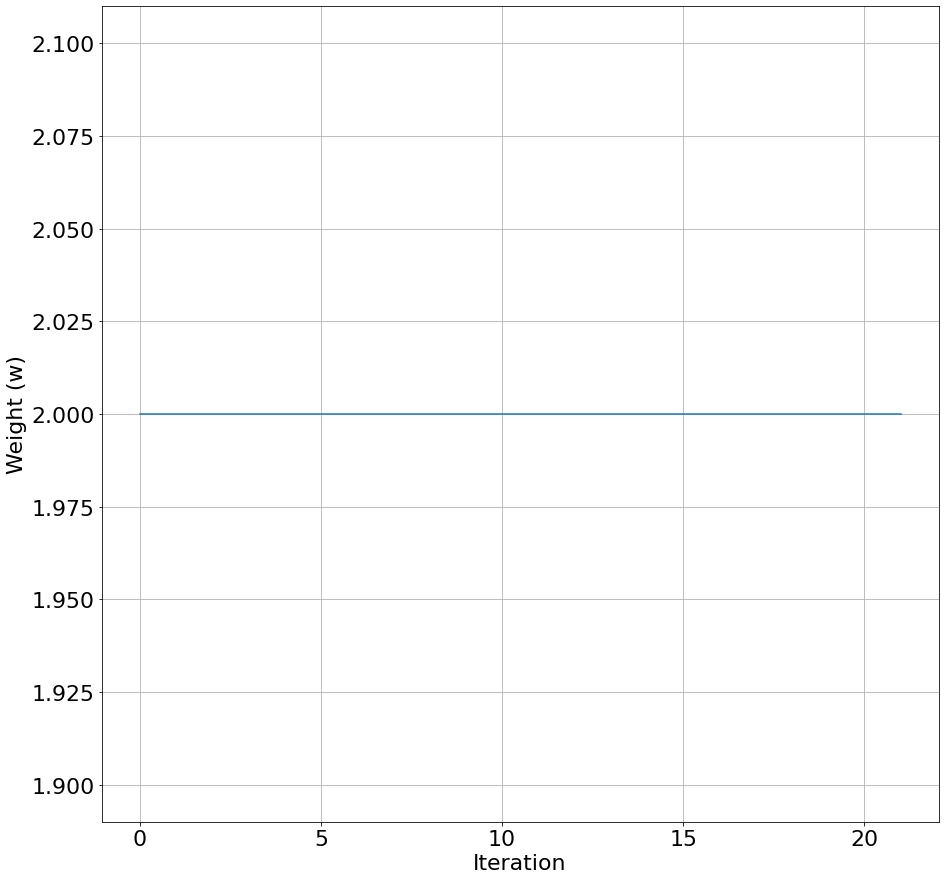

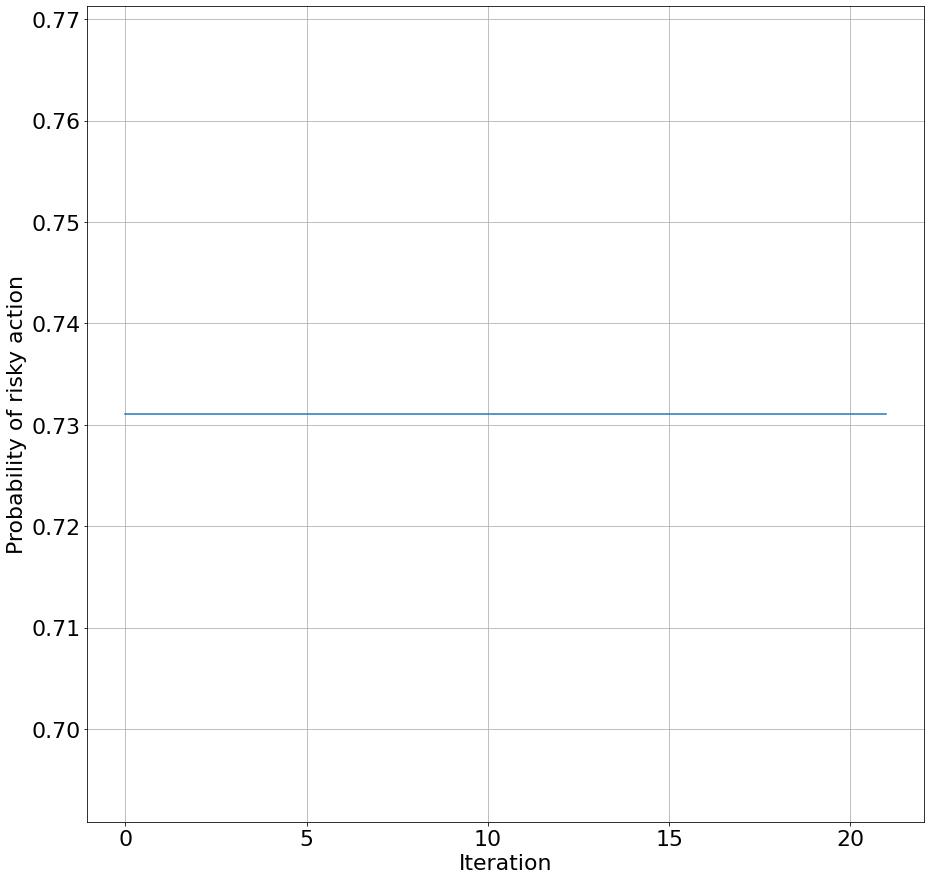

In [48]:
w,p = run(dc_r, n_steps)

## Risky Aversion (Safe)

In [49]:
dc_nr = get_linear_decision_maker(torch.as_tensor([
    [2]
], dtype=torch.float))

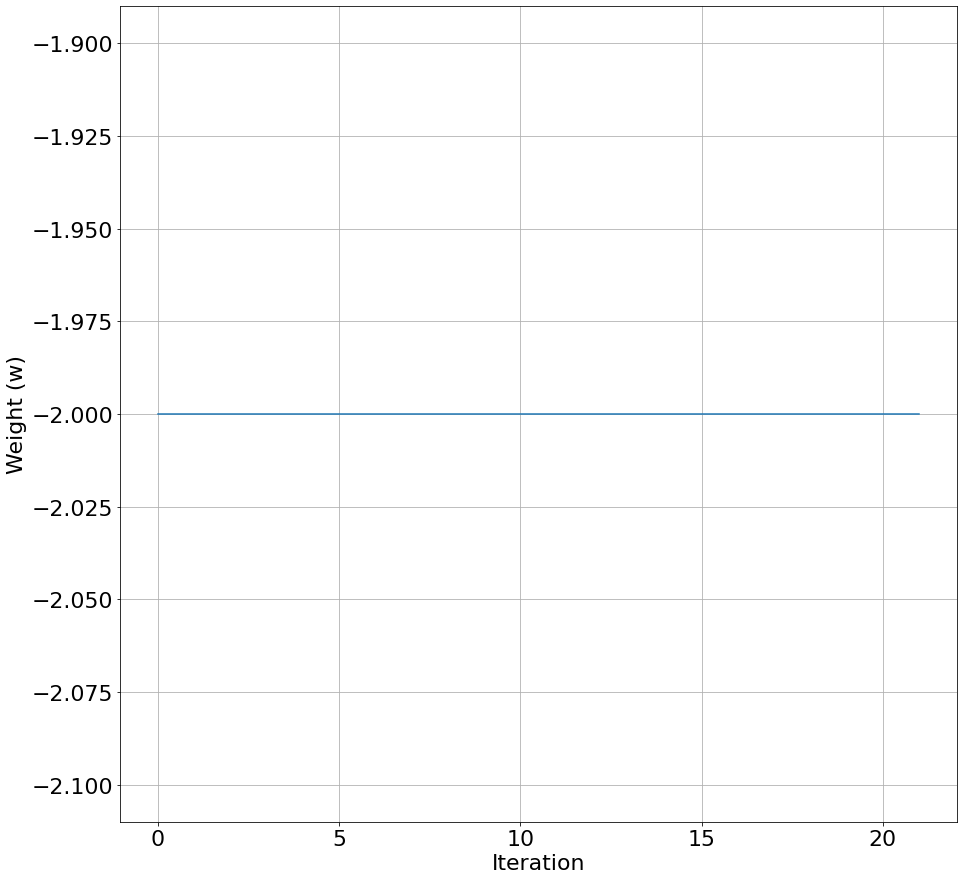

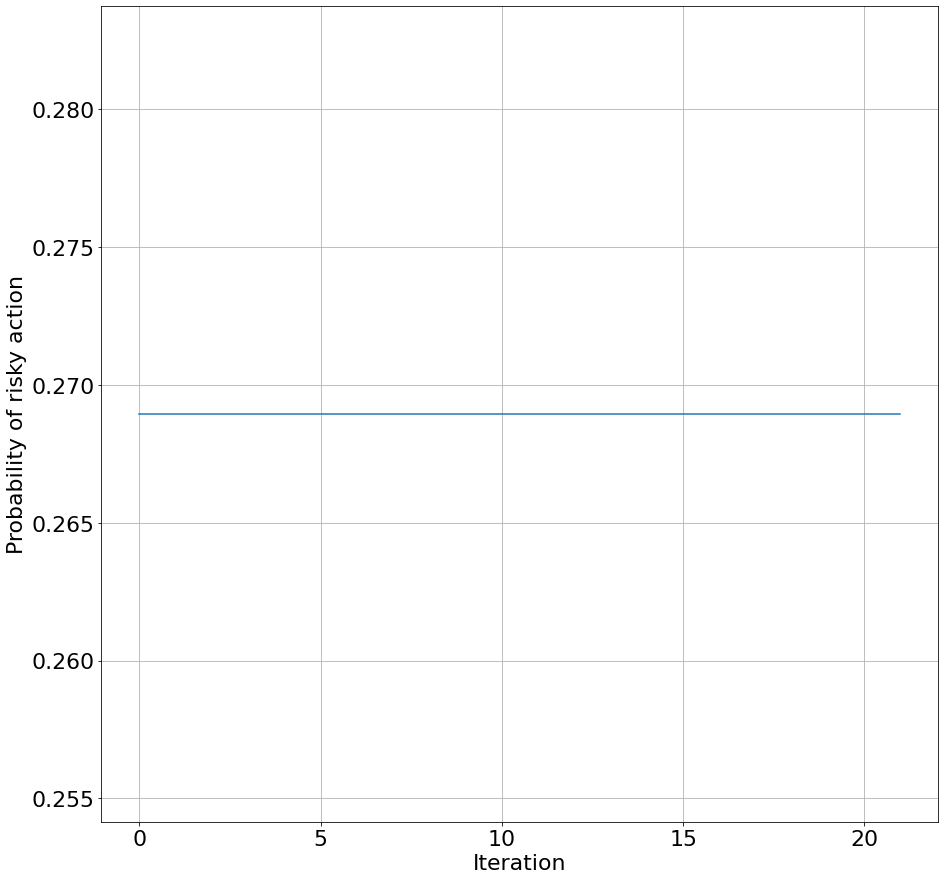

In [50]:
w,p = run(dc_nr, n_steps)

## Random

In [ ]:
dc_rand = get_linear_decision_maker(torch.as_tensor([
    [0]
], dtype=torch.float))

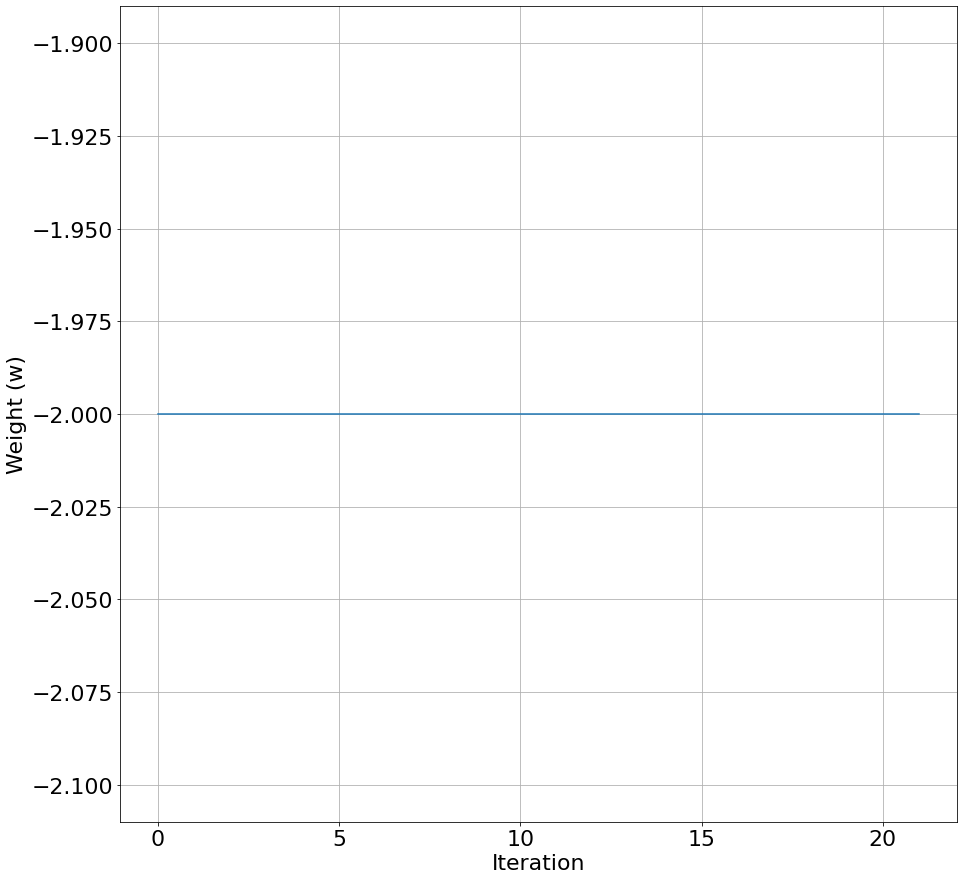

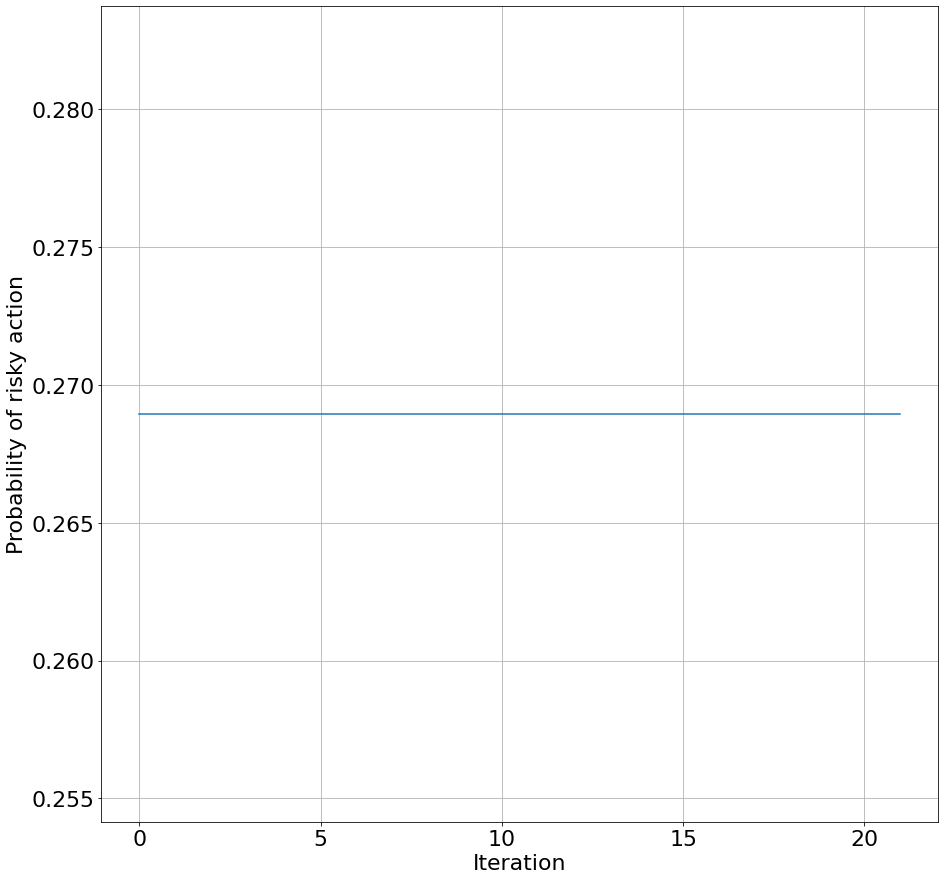

In [ ]:
w,p = run(dc_rand, n_steps)

## Risky (but not too much) 

In [51]:
dc_rntm = get_linear_decision_maker(torch.as_tensor([
    [-8],
    [8],
    [6],
], dtype=torch.float))

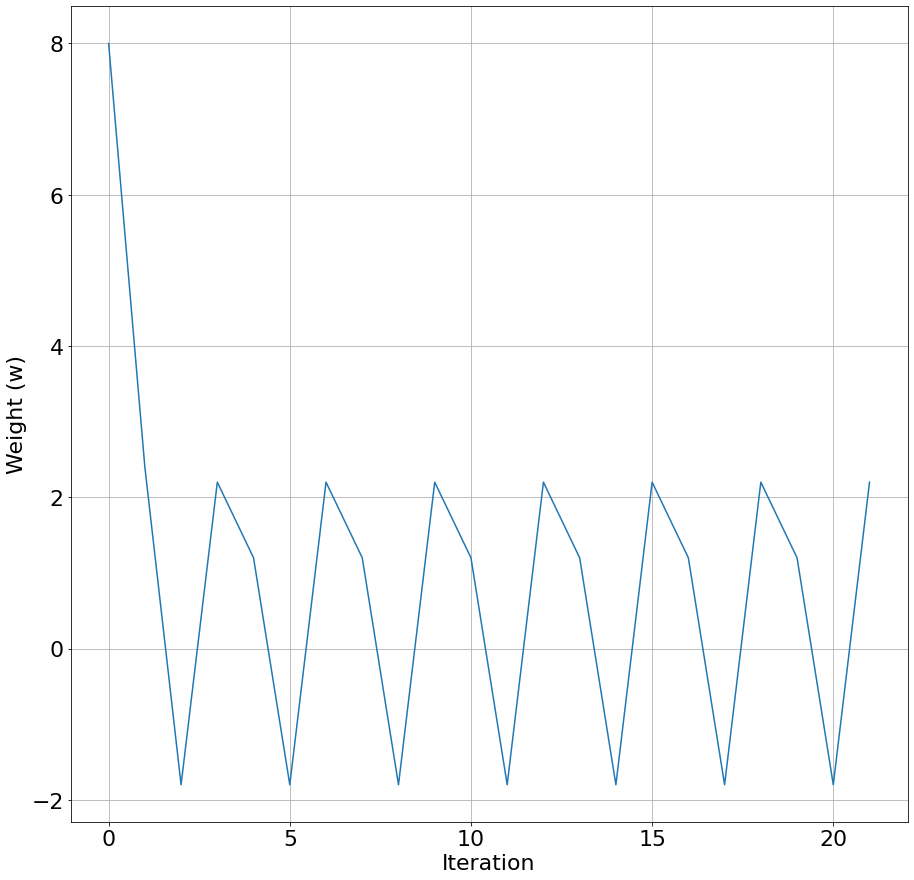

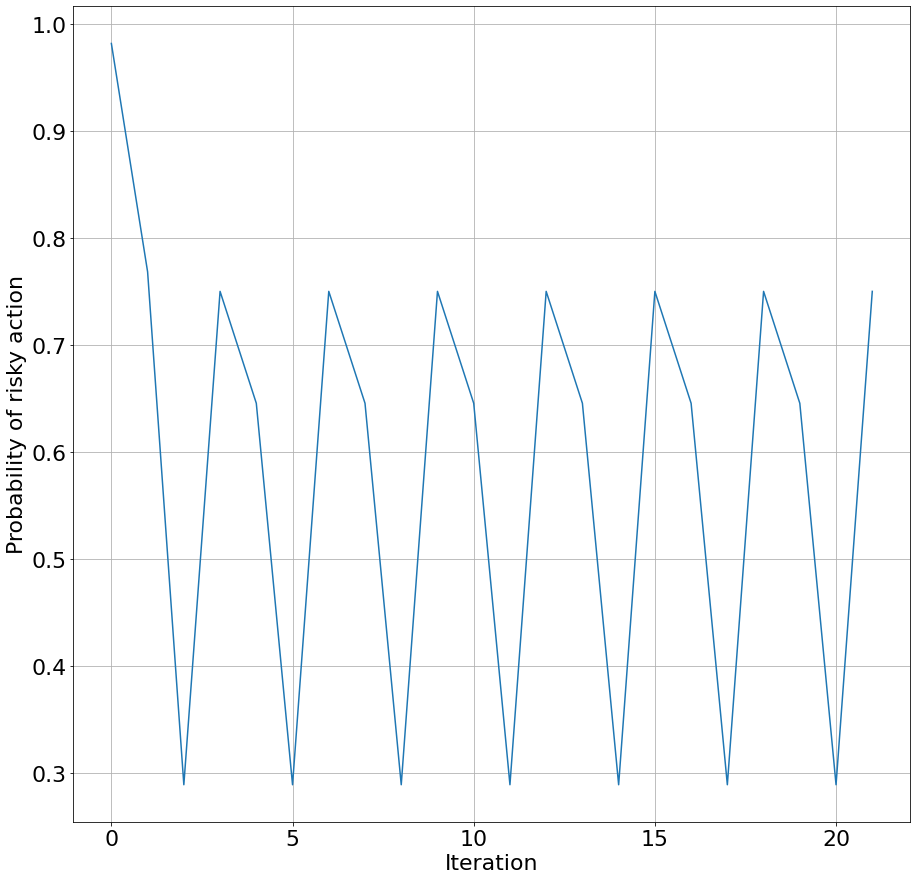

In [52]:
w,p = run(dc_rntm, n_steps)